# Full-FORCE demonstration
Eli Pollock, Jazayeri Lab, MIT Brain and Cognitive Sciences

The following demonstration is based on the full-FORCE algorithm described in [DePasquale et al. 2017](https://arxiv.org/abs/1710.03070)

Thanks to Brian DePasquale for providing example code. For MATLAB demo, see [https://bitbucket.org/briandepasquale/full_force_learning/]. 

First, we create a function that will output our desired inputs, targets, and hints:

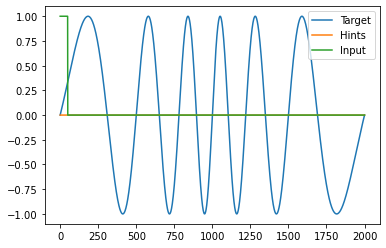

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

def fullforce_oscillation_test(dt, showplots=0):
    dt_per_s = round(1/dt)
    
    # From the paper, and the online demo:
    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    omega = np.zeros((2*dt_per_s+1,1))
    omega = np.linspace(2*np.pi, 6*np.pi, 1*dt_per_s+1)
    targ = np.zeros((2*dt_per_s+1,1))
    targ[0:(1*dt_per_s+1),0] = np.sin(t[0:(1*dt_per_s+1),0]*omega)
    targ[1*dt_per_s:(2*dt_per_s+1)] = -np.flipud(targ[0:(1*dt_per_s+1)])
    
    # A simpler example: just a sine wave
    '''
    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    omega = np.ones((2*dt_per_s+1,1)) * 4 *np.pi
    targ = np.sin(t*omega)
    '''
    
    # A slightly harder example: sum of sine waves
    '''
    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    omega = np.ones((2*dt_per_s+1,1)) * 4 *np.pi
    targ = np.sin(t*2*omega) * np.sin(t*omega/4)
    '''
    
    inp = np.zeros(targ.shape)
    inp[0:round(0.05*dt_per_s),0] = np.ones((round(0.05*dt_per_s)))
    hints = np.zeros(targ.shape)

    if showplots == 1:
        plt.figure()
        plt.plot(targ)
        plt.plot(hints)
        plt.plot(inp)
        plt.legend(['Target','Hints','Input'])
        plt.show()
    
    return inp, targ, hints

fullforce_oscillation_test(dt=0.001,showplots=1);

Below, we can train and test the network using the FF_Demo module. The key component is the RNN object class, which has activity and weights as attributes as methods that allow for training, running, and testing the network on arbitrary tasks. Open up the module file to see how RLS is implemented.

Here, I create a parameter dictionary, hand-tune some of them, instantiate an RNN, train it with full-FORCE, and then test it. You can see where the algorithm spends most of its time with %lprun. It should only take a couple of minutes to get good training results.

Note that FF_Demo requires numpy, scipy, and matplotlib, but that's it! 

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Initializing...
Training network...
Batch 1 of 10, 10 trials: 
..........
Batch 2 of 10, 10 trials: 
..........
Batch 3 of 10, 10 trials: 
..........
Batch 4 of 10, 10 trials: 
..........
Batch 5 of 10, 10 trials: 
..........
Batch 6 of 10, 10 trials: 
..........
Batch 7 of 10, 10 trials: 
..........
Batch 8 of 10, 10 trials: 
..........
Batch 9 of 10, 10 trials: 
..........
Batch 10 of 10, 10 trials: 
..........
Done training!
Initializing.....
Testing: 10 trials
..........
Normalized error: 0.0160183


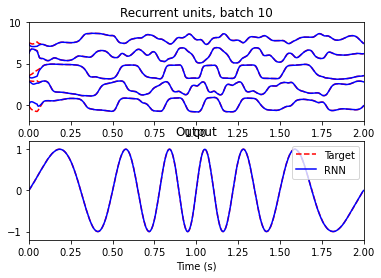

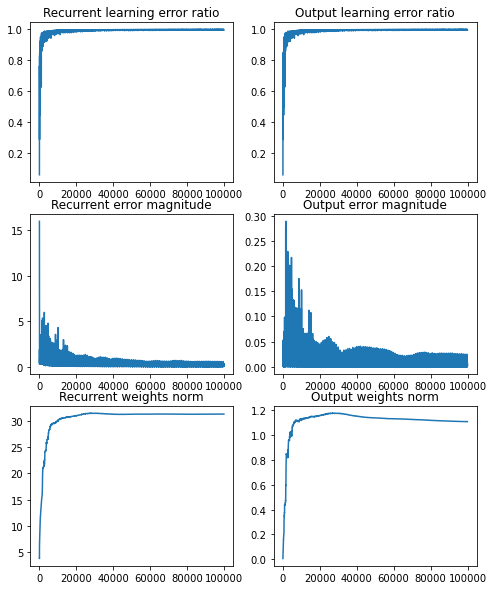

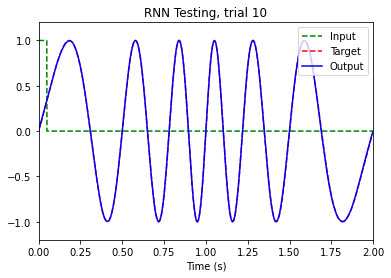

In [21]:
import Full_FORCE_Sehyun as FF_Demo
%load_ext line_profiler

p = FF_Demo.create_parameters(dt=0.001)
p['g'] = 1.5 # From paper
p['ff_num_batches'] = 10
p['ff_trials_per_batch'] = 10
p['test_init_trials']=5

rnn = FF_Demo.RNN(p,1,1)

rnn.train(fullforce_oscillation_test, monitor_training=1)

# With line_profiler:
# %lprun -f rnn.train rnn.train(fullforce_oscillation_test, monitor_training=1)


rnn.test(fullforce_oscillation_test);

The training statistics include an "error ratio" that is the ratio of the error after the update to the error before the update. It should converge to 1, meaning that the network cannot do any better.

The error magnitude is the just the norm of the error. That should decrease to close to 0.

The weights norm is, as one would expect, the norm of all weights. That should converge on some constant value as the weights stabilize.